In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

from datetime import datetime, timedelta
from utils import get_ticker_prices
from tech_analysis import moving_average, exp_moving_average, \
    vol_moving_average, realized_vol, upper_shadow, lower_shadow

# Loading data #

In [28]:
btc = get_ticker_prices('BTC-USD', start='2016-01-01', end=datetime.now()-timedelta(days=1))
sap = get_ticker_prices('^GSPC', start='2016-01-01', end=datetime.now()-timedelta(days=1))

In [29]:
btc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,425.875000,432.920990,418.734985,430.566986,45996600
2016-01-01,430.721008,436.246002,427.515015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,38477500


In [30]:
sap.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2655330000
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,5076590000


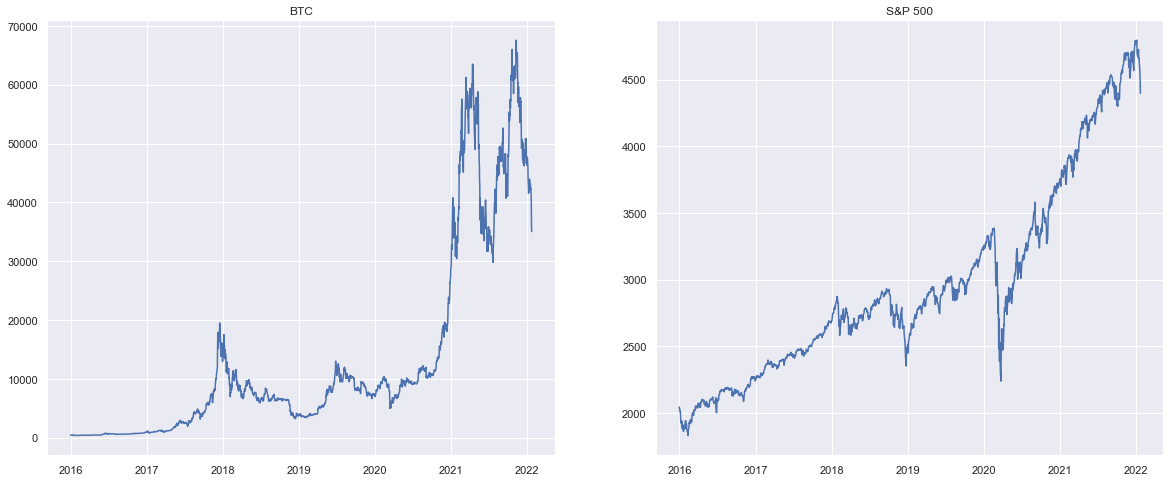

In [31]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(121)
ax1.plot(btc.Close)
ax1.set_title("BTC")

ax2 = fig.add_subplot(122)
ax2.plot(sap.Close)
ax2.set_title("S&P 500");

# Technical Analysis Indicators #

## Moving average ##

In [32]:
btc['MA_30'] = moving_average(btc, 30)
btc['MA_60'] = moving_average(btc, 60)
sap['MA_30'] = moving_average(sap, 30)
sap['MA_60'] = moving_average(sap, 60)

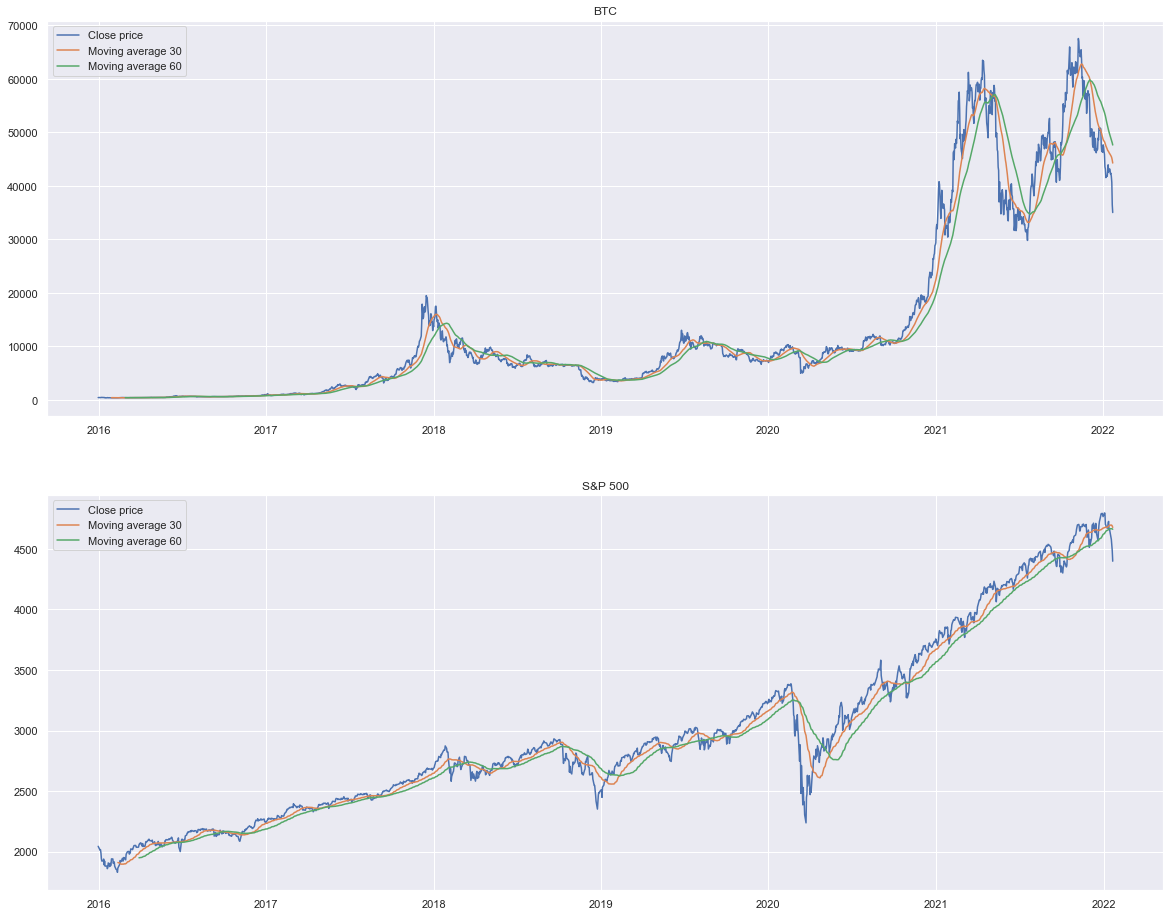

In [33]:
fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(211)
ax1.plot(btc.Close, label='Close price')
ax1.plot(btc.MA_30, label='Moving average 30')
ax1.plot(btc.MA_60, label='Moving average 60')
ax1.set_title('BTC')
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(sap.Close, label='Close price')
ax2.plot(sap.MA_30, label='Moving average 30')
ax2.plot(sap.MA_60, label='Moving average 60')
ax2.set_title('S&P 500')
ax2.legend();

## Exponential moving average ##

In [34]:
btc['EMA_30'] = exp_moving_average(btc, 30)
btc['EMA_60'] = exp_moving_average(btc, 60)
sap['EMA_30'] = exp_moving_average(sap, 30)
sap['EMA_60'] = exp_moving_average(sap, 60)

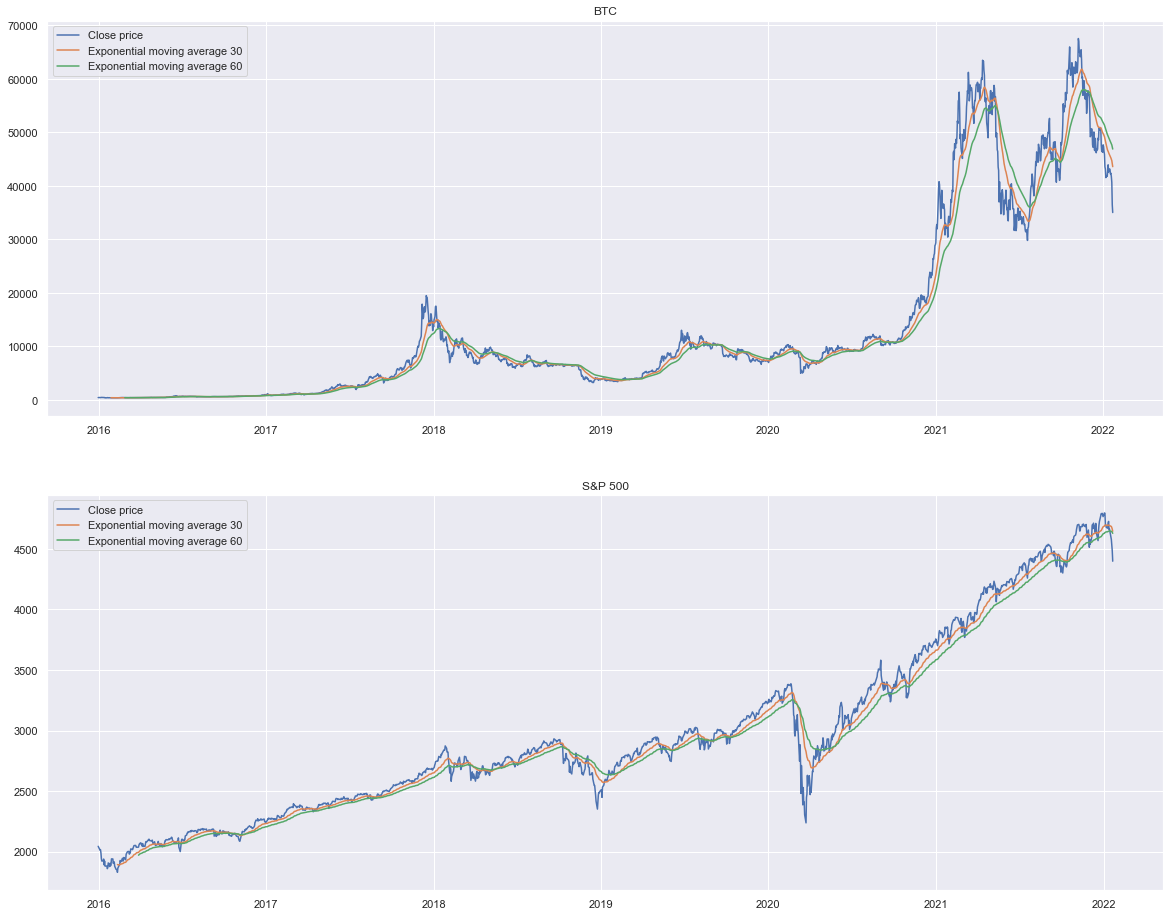

In [35]:
fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(211)
ax1.plot(btc.Close, label='Close price')
ax1.plot(btc.EMA_30, label='Exponential moving average 30')
ax1.plot(btc.EMA_60, label='Exponential moving average 60')
ax1.set_title('BTC')
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(sap.Close, label='Close price')
ax2.plot(sap.EMA_30, label='Exponential moving average 30')
ax2.plot(sap.EMA_60, label='Exponential moving average 60')
ax2.set_title('S&P 500')
ax2.legend();

## Volume moving average ##

In [36]:
btc['VMA_7'] = vol_moving_average(btc, 7)
btc['VMA_15'] = vol_moving_average(btc, 15)
btc['VMA_30'] = vol_moving_average(btc, 30)
btc['VMA_60'] = vol_moving_average(btc, 60)

sap['VMA_7'] = vol_moving_average(sap, 7)
sap['VMA_15'] = vol_moving_average(sap, 15)
sap['VMA_30'] = vol_moving_average(sap, 30)
sap['VMA_60'] = vol_moving_average(sap, 60)

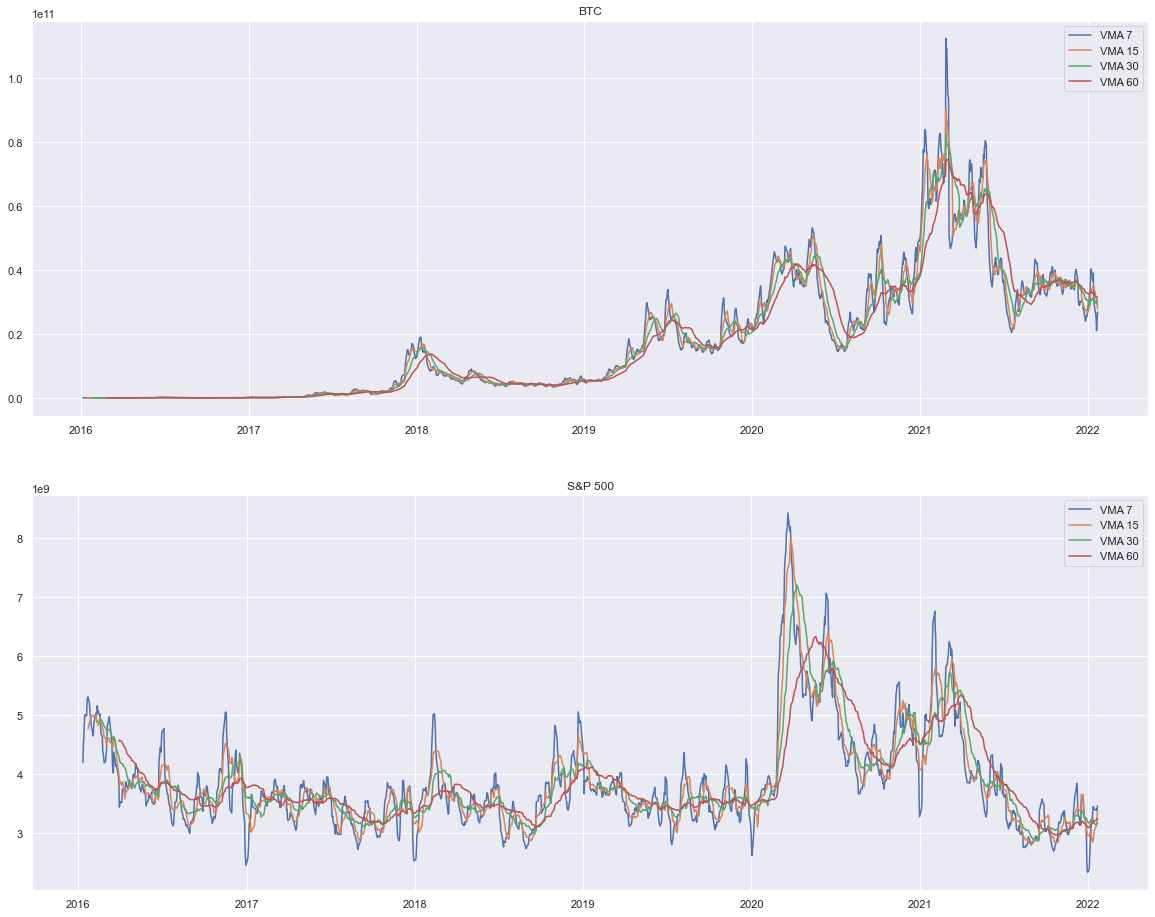

In [37]:
fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(211)
ax1.plot(btc.VMA_7, label='VMA 7')
ax1.plot(btc.VMA_15, label='VMA 15')
ax1.plot(btc.VMA_30, label='VMA 30')
ax1.plot(btc.VMA_60, label='VMA 60')
ax1.set_title('BTC')
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(sap.VMA_7, label='VMA 7')
ax2.plot(sap.VMA_15, label='VMA 15')
ax2.plot(sap.VMA_30, label='VMA 30')
ax2.plot(sap.VMA_60, label='VMA 60')
ax2.set_title('S&P 500')
ax2.legend();

In [38]:
btc['Upper_shadow'] = upper_shadow(btc)
btc['Lower_shadow'] = lower_shadow(btc)
sap['Upper_shadow'] = upper_shadow(sap)
sap['Lower_shadow'] = lower_shadow(sap)

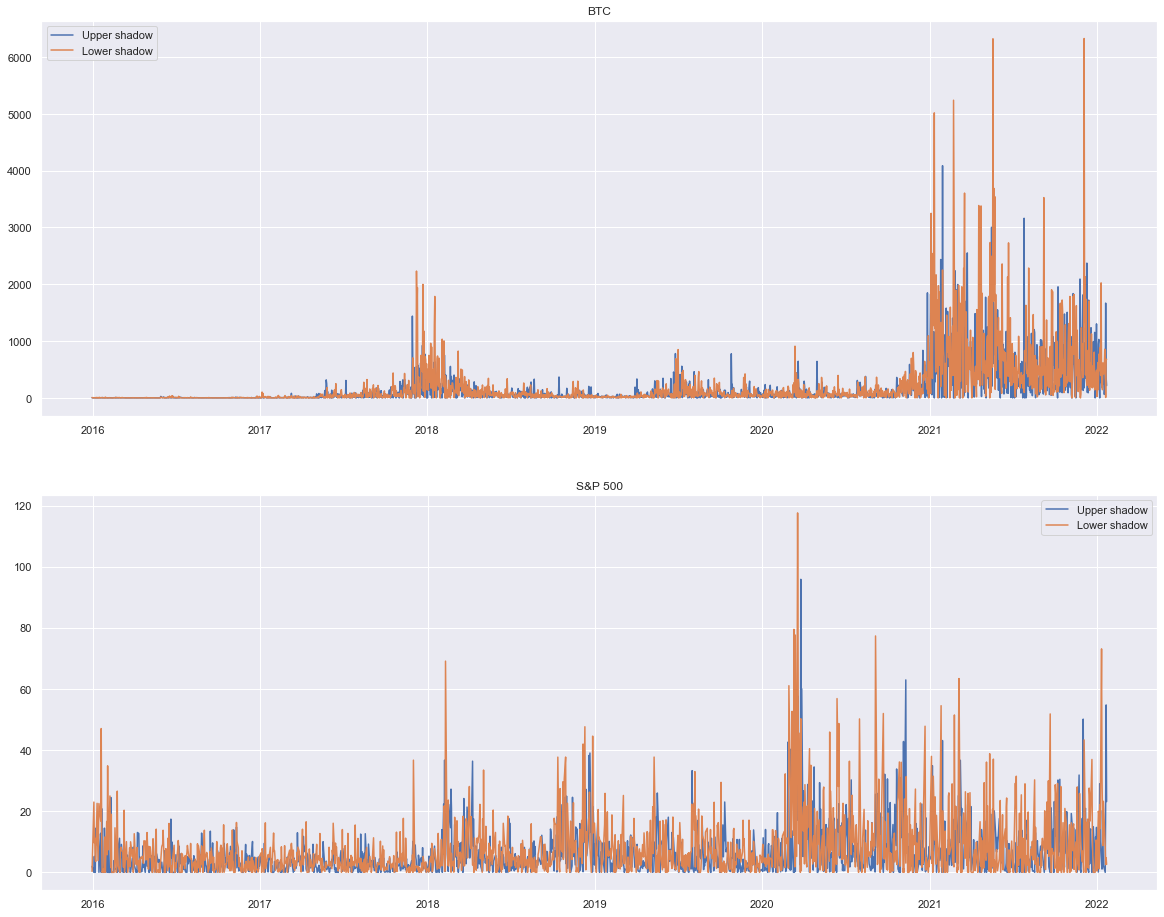

In [39]:
fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(211)
ax1.plot(btc.Upper_shadow, label='Upper shadow')
ax1.plot(btc.Lower_shadow, label='Lower shadow')
ax1.set_title('BTC')
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(sap.Upper_shadow, label='Upper shadow')
ax2.plot(sap.Lower_shadow, label='Lower shadow')
ax2.set_title('S&P 500')
ax2.legend();

In [40]:
btc['High_div_low'] = btc['High'] / btc['Low']
sap['High_div_low'] = sap['High'] / sap['Low']

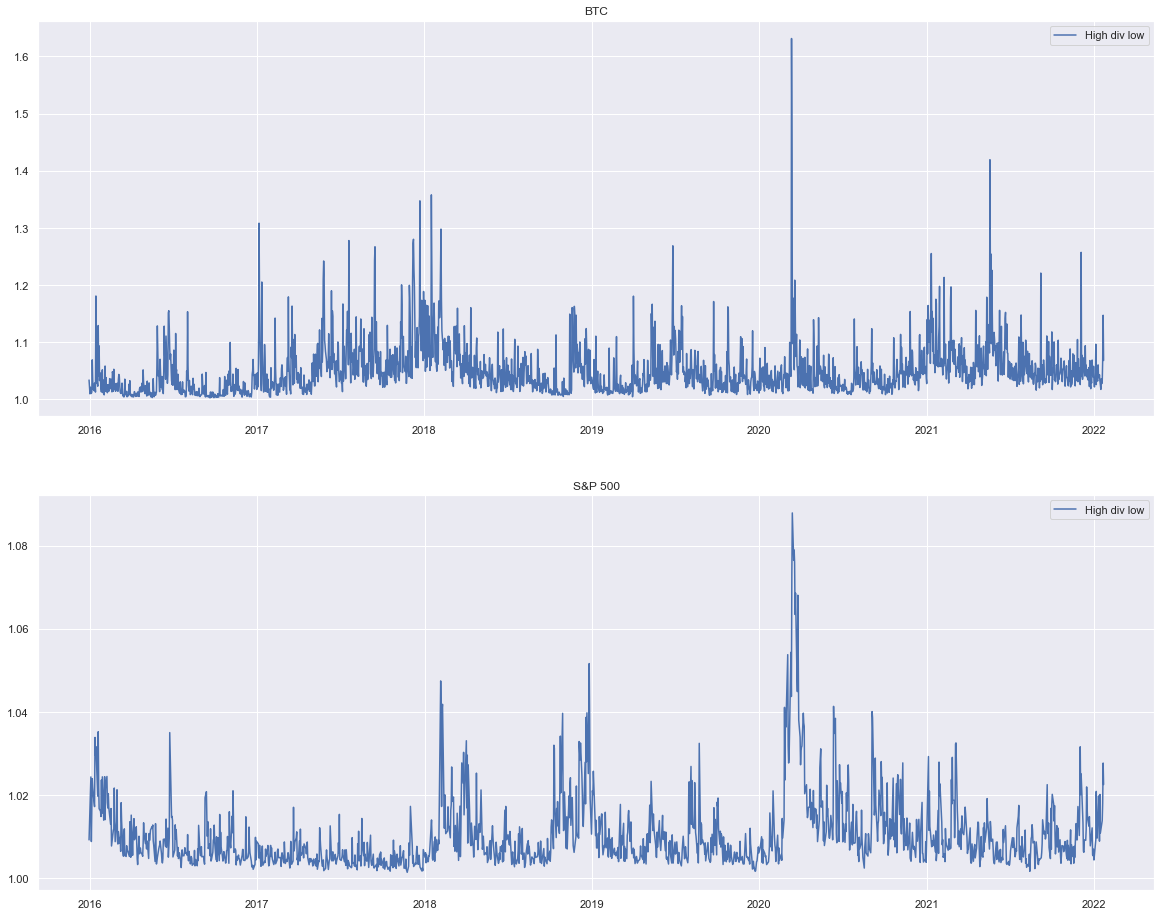

In [41]:
fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(211)
ax1.plot(btc.High_div_low, label='High div low')
ax1.set_title('BTC')
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(sap.High_div_low, label='High div low')
ax2.set_title('S&P 500')
ax2.legend();

In [42]:
btc['Open_sub_close'] = btc['Open'] - btc['Close']
sap['Open_sub_close'] = sap['Open'] - sap['Close']

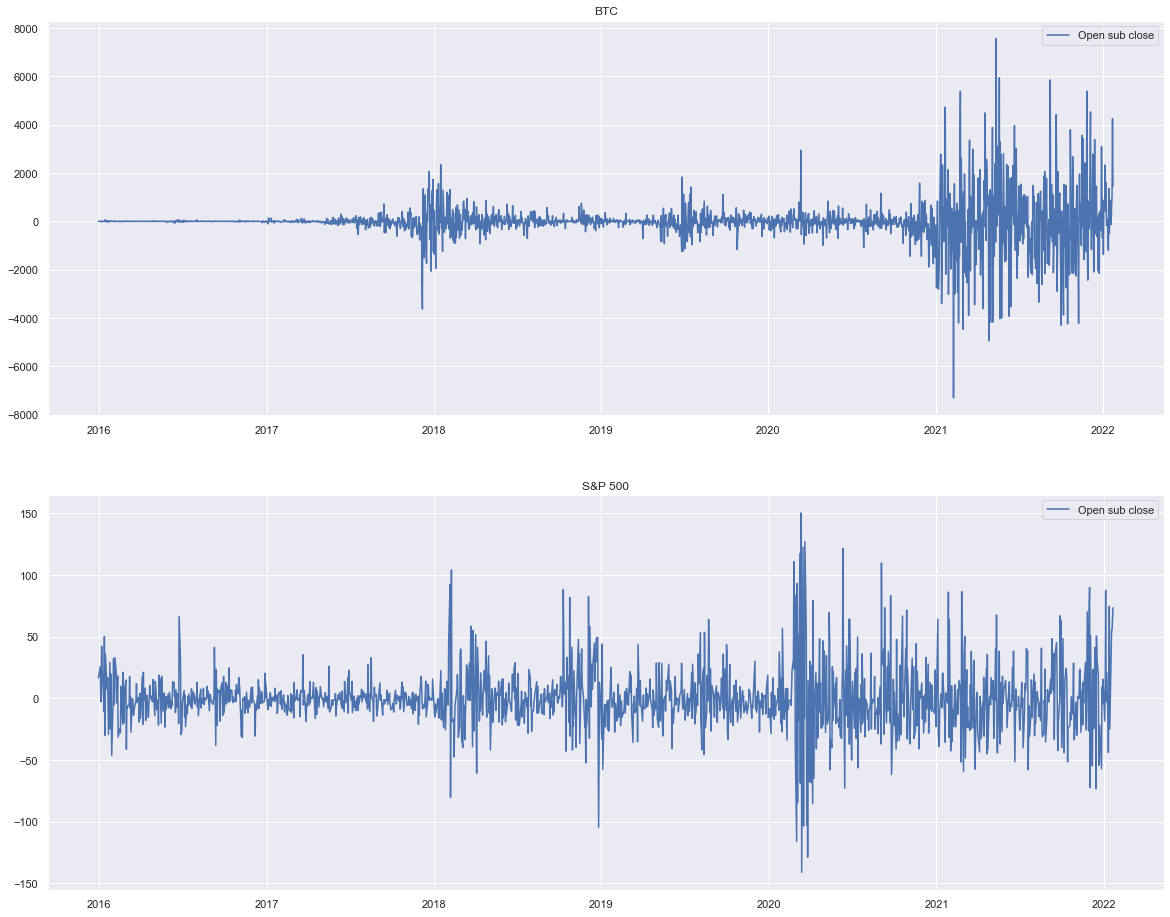

In [43]:
fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(211)
ax1.plot(btc.Open_sub_close, label='Open sub close')
ax1.set_title('BTC')
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(sap.Open_sub_close, label='Open sub close')
ax2.set_title('S&P 500')
ax2.legend();

## Returns ##

In [44]:
btc['Returns'] = btc['Close'].pct_change().dropna()
sap['Returns'] = sap['Close'].pct_change().dropna()

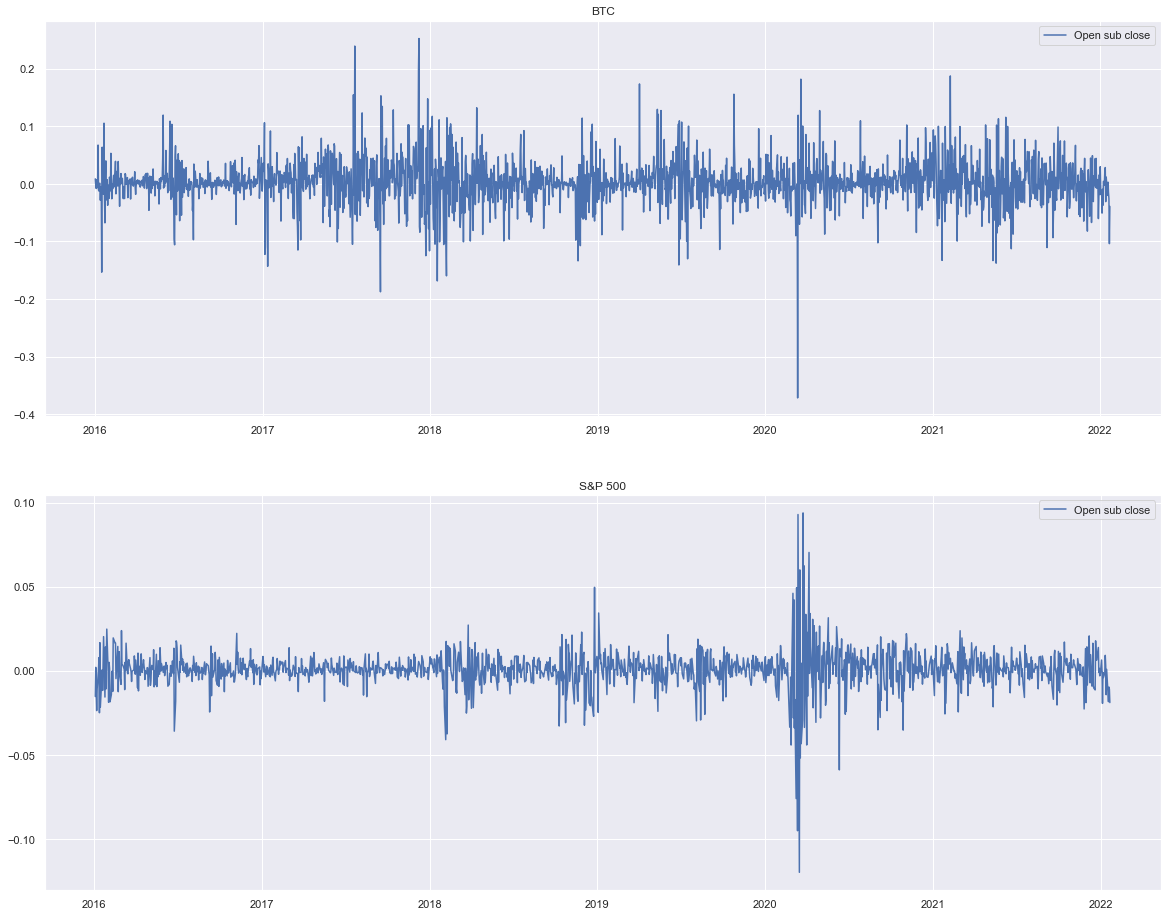

In [45]:
fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(211)
ax1.plot(btc.Returns, label='Open sub close')
ax1.set_title('BTC')
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(sap.Returns, label='Open sub close')
ax2.set_title('S&P 500')
ax2.legend();

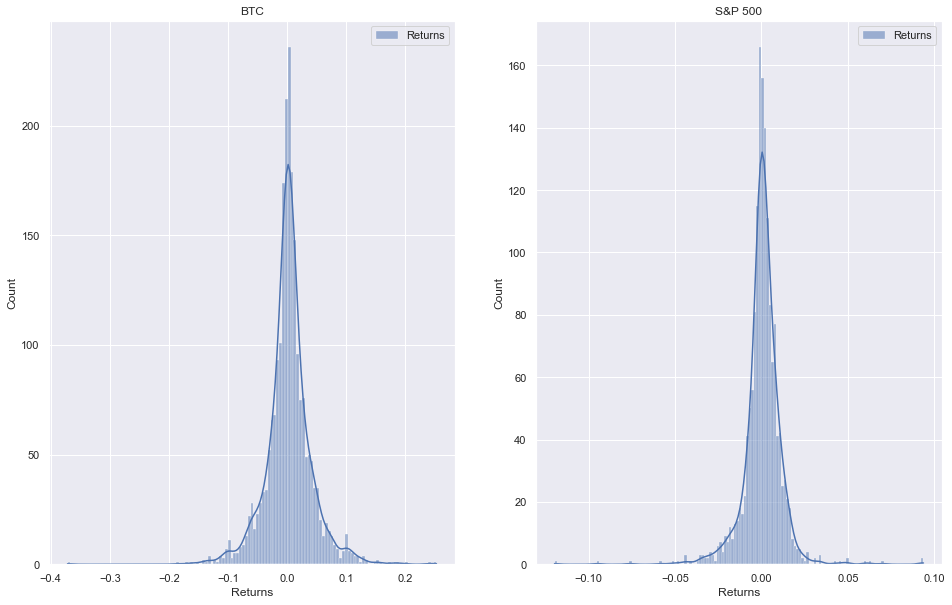

In [46]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(121)
sns.histplot(btc.Returns, kde=True, label='Returns')
ax1.set_title('BTC')
ax1.legend()

ax2 = fig.add_subplot(122)
sns.histplot(sap.Returns, kde=True, label='Returns')
ax2.set_title('S&P 500')
ax2.legend();

## Realized Volatility ##

In [47]:
btc['Realized_vol'] = realized_vol(btc, 30)
sap['Realized_vol'] = realized_vol(sap, 21)

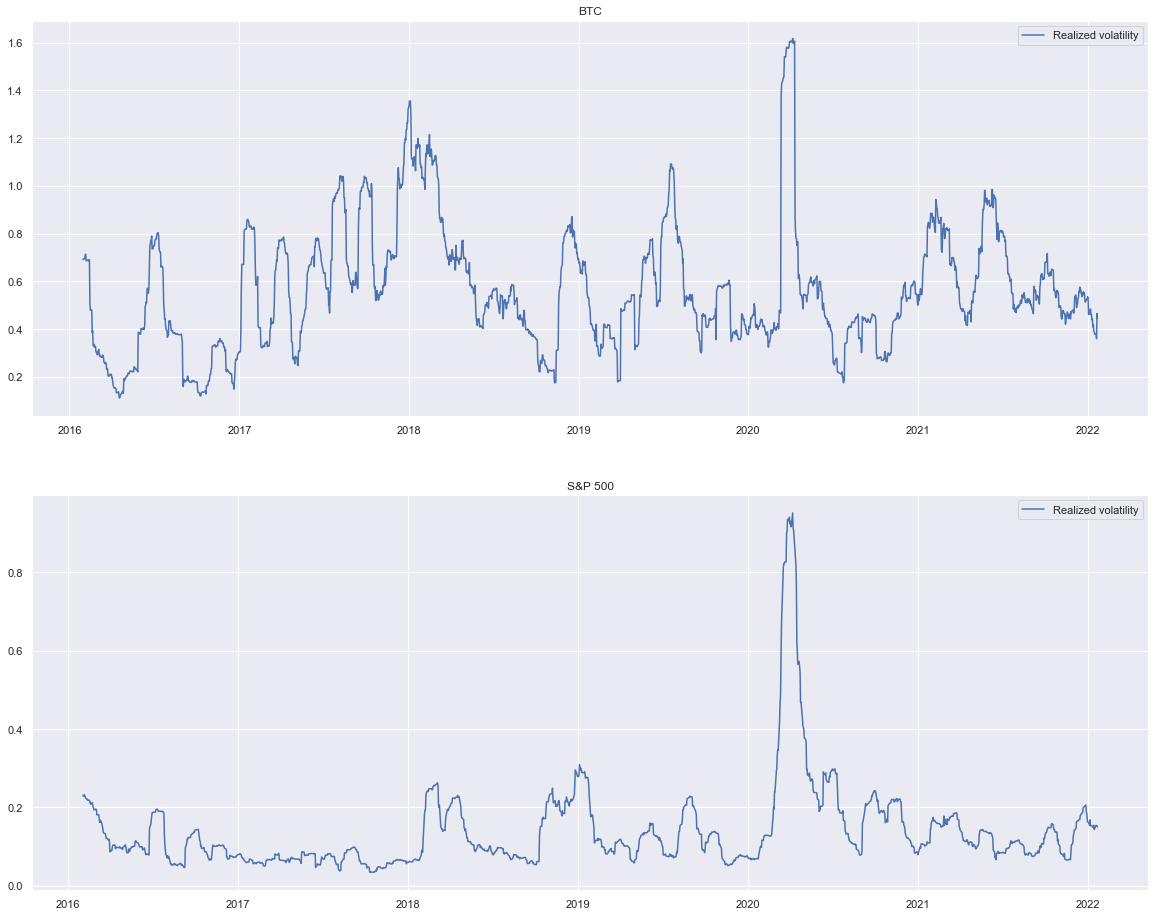

In [48]:
fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(211)
ax1.plot(btc.Realized_vol, label='Realized volatility')
ax1.set_title('BTC')
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(sap.Realized_vol, label='Realized volatility')
ax2.set_title('S&P 500')
ax2.legend();

# Correlation #

In [49]:
corr = btc.corr()
corr['Returns'].sort_values(ascending=False)

Returns           1.000000
Realized_vol      0.006113
Close             0.001813
Upper_shadow     -0.007291
Volume           -0.007537
VMA_7            -0.011363
Low              -0.011714
VMA_15           -0.011831
VMA_30           -0.014343
VMA_60           -0.014344
High             -0.014988
Open             -0.032294
EMA_30           -0.034897
MA_30            -0.036339
EMA_60           -0.038625
MA_60            -0.040091
High_div_low     -0.089297
Lower_shadow     -0.133299
Open_sub_close   -0.671005
Name: Returns, dtype: float64

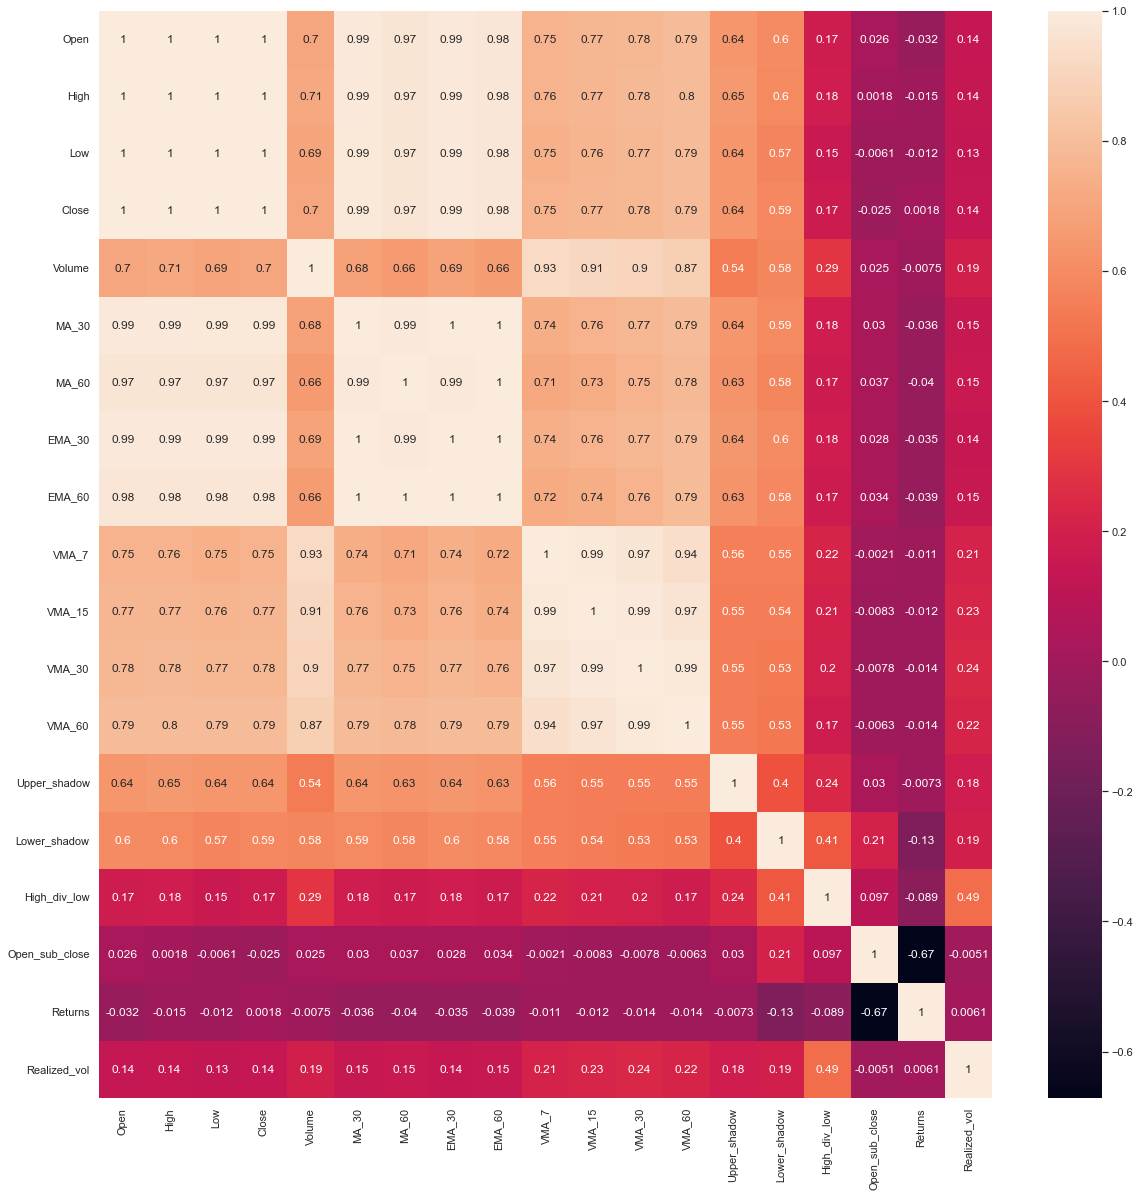

In [50]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True);